# Phase 2 Review

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [4]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Question 1

A Hollywood executive wants to know how much an R-rated movie released after 2000 will earn. The data above is a sample of some of the movies with that rating during that timeframe, as well as other movies. How would you go about answering her question? Talk through it theoretically and then do it in code.

What is the 95% confidence interval for a post-2000 R-rated movie's box office gross?

In [ ]:
# talk through your answer here
"""
1. Get movies made 2000 or after by slicing at title_year
2. Check for null values and drop them if they are not a significant portion of the data
3. Check for normal distribution, if it is normal use empirical rule (95% = 2 std from center)
4. If not use Central Limit Theorem, grab sample and calculate z score and find interval
"""

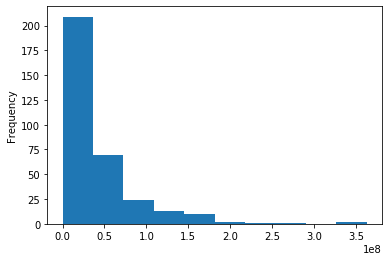

In [14]:
# do it in code here
df_2010 = df[(df["title_year"]>2010) & (df["content_rating"]=="R")]
# check null
#df_2010.isnull().sum() # 96 null in gross
#df_2010.shape #477 entries. dropping null due to time constraints
df_2010 = df_2010.dropna()
df_2010["gross"].plot(kind="hist") #not normal!



In [16]:
import scipy.stats as stats

In [ ]:
# 95% confidence interval
stats.t.interval(alpha = 0.95, )

## Question 2a

Your ability to answer the first question has the executive excited and now she has many other questions about the types of movies being made and the differences in those movies budgets and gross amounts.

Read through the questions below and **determine what type of statistical test you should use** for each question and **write down the null and alternative hypothesis for those tests**.

- Is there a relationship between the number of Facebook likes for a cast and the box office gross of the movie?
- Do foreign films perform differently at the box office than non-foreign films?
- Of all movies created are 40% rated R?
- Is there a relationship between the language of a film and the content rating (G, PG, PG-13, R) of that film?
- Is there a relationship between the content rating of a film and its budget? 

In [ ]:
# your answers here


## Question 2b

Calculate the answer for the second question:

- Do foreign films perform differently at the box office than non-foreign films?

In [ ]:
# your answer here


## Question 3

Now that you have answered all of those questions, the executive wants you to create a model that predicts the money a movie will make if it is released next year in the US. She wants to use this to evaluate different scripts and then decide which one has the largest revenue potential. 

Below is a list of potential features you could use in the model. Create a new frame containing only those variables.

Would you use all of these features in the model?

Identify which features you might drop and why.

*Remember you want to be able to use this model to predict the box office gross of a film **before** anyone has seen it.*

- **budget**: The amount of money spent to make the movie
- **title_year**: The year the movie first came out in the box office
- **years_old**: How long has it been since the movie was released
- **genre**: Each movie is assigned one genre category like action, horror, comedy
- **avg_user_rating**: This rating is taken from Rotten tomatoes, and is the average rating given to the movie by the audience
- **actor_1_facebook_likes**: The number of likes that the most popular actor in the movie has
- **total_cast_facebook_likes**: The sum of likes for the three most popular actors in the movie
- **language**: the original spoken language of the film


In [ ]:
# your answer here


## Question 4a

Create the following variables:

- `years_old`: The number of years since the film was released.
- Dummy categories for each of the following ratings:
    - `G`
    - `PG`
    - `R`
    
Once you have those variables, create a summary output for the following OLS model:

`gross~cast_total_facebook_likes+budget+years_old+G+PG+R`

In [ ]:
# your answer here


## Question 4b

Below is the summary output you should have gotten above. Identify any key takeaways from it.
- How ‘good’ is this model?
- Which features help to explain the variance in the target variable? 
    - Which do not? 


<img src="ols_summary.png" style="withd:300px;">

In [ ]:
# your answer here


## Question 5

**Bayes Theorem**

An advertising executive is studying television viewing habits of married men and women during prime time hours. Based on the past viewing records he has determined that during prime time wives are watching television 60% of the time. It has also been determined that when the wife is watching television, 40% of the time the husband is also watching. When the wife is not watching the television, 30% of the time the husband is watching the television. Find the probability that if the husband is watching the television, the wife is also watching the television.

In [15]:
# your answer here
wives_tv = 0.6
husband_wives_tv = 0.4
no_wives_husband_tv = 0.3

husband_and_wives_tv = (wives_tv*husband_wives_tv)/((wives_tv*husband_wives_tv)+((1-wives_tv)*no_wives_husband_tv))
husband_wives_tv

0.4

## Question 6

Explain what a Type I error is and how it relates to the significance level when doing a statistical test. 

In [ ]:
# your answer here
"""
Type I error is when the test fails to correctly reject the null hypothesis. If a test shows significance level
less than the set alpha of the test, one should reject the null hypothesis. Type 1 error occurs when null hypothesis
is not correctly rejected when the significance level of the test is less than the set alpha. 
"""